In [1]:
# Importing Libraries
import numpy as np
import scipy.sparse as sp
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the data
adj = sp.load_npz("../data/data/adj.npz")
features = np.load("../data/data/features.npy")
labels = np.load("../data/data/labels.npy")
with open("../data/data/splits.json") as f:
    splits = json.load(f)

### Data Preprocessing

In [9]:

print(f"Adjacency matrix shape: {adj.shape}")
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Train set size: {len(splits['idx_train'])}, Test set size: {len(splits['idx_test'])}")

Adjacency matrix shape: (2480, 2480)
Features shape: (2480, 1390)
Labels shape: (496,)
Train set size: 496, Test set size: 1984


In [10]:
# Check for NaNs or Infs
assert not np.isnan(features).any(), "NaN in features!"
assert not np.isinf(features).any(), "Inf in features!"

In [11]:
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [24]:
# Convert to NumPy array (in case it's a list)
idx_train = np.array(splits['idx_train'])
idx_test = np.array(splits['idx_test'])

# Extract training features
X_train = features[idx_train]
X_test = features[idx_test]

### Exploratory Data Analysis

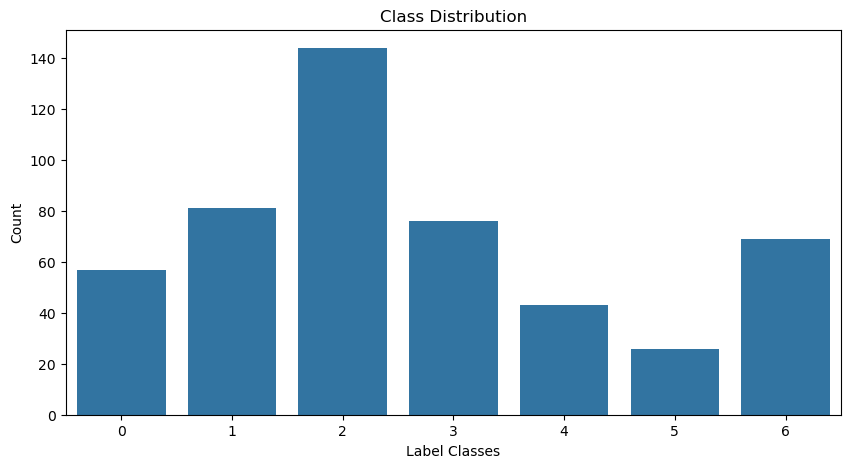

In [12]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=unique_labels, y=label_counts)
plt.xlabel("Label Classes")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [25]:
# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

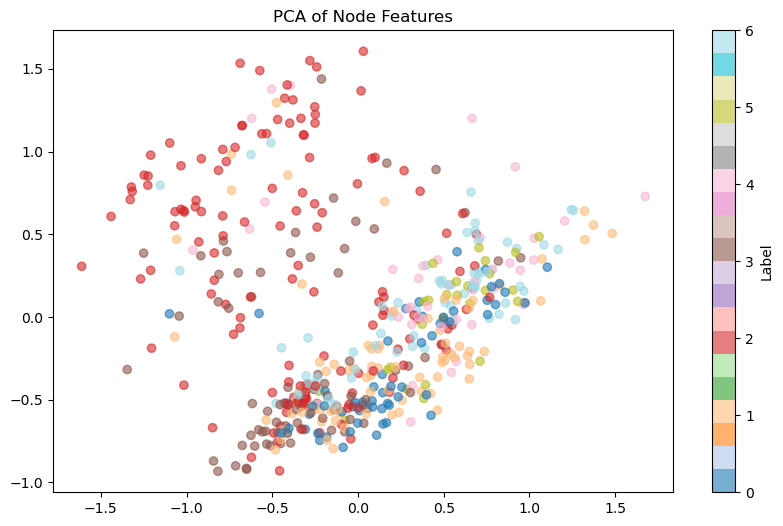

In [26]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab20', alpha=0.6)
plt.colorbar(scatter, label='Label')
plt.title('PCA of Node Features')
plt.show()

### Feature Engineering

In [16]:
degrees = np.array(adj.sum(axis=1)).flatten()
features_with_degree = np.column_stack((features_scaled, degrees))

print(f"New features shape (with degree): {features_with_degree.shape}")


New features shape (with degree): (2480, 1391)
